### <h1> NLP and the Web: Home Exercise 5 </h1>

__Regarding type hints:__

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle and we will try to help you out. We provide type hints for function parameters and return values of functions that you have to implement in the tasks. These are suggestions only, and you may use different types if you prefer. As long as you produce the required output in a coherent and understandable way, you can get full points. We use the term 'array-like object' to loosely refer to collection types like lists, arrays, maps, dataframes, etc._

__Regarding documentation__:

<i>Please use comments where appropriate to help tutors understand your code. This is especially important for the more extensive exercises later on. We also strongly encourage you to use type hints.</i>

__Regarding output of results__:

<i>Please pay attention to output results (e.g. with `print()` or `display()`) when we ask you to in a task. It is your choice how you output results, but for dataframes we recommend the use of `display(df)`.</i>

In [74]:
from typing import Mapping
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import collections
import random
import seaborn as sns
sns.set()

from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering

## Task 1: PageRank Algorithm (12 Points)

In this task, you will implement and execute the [PageRank algorithm](https://en.wikipedia.org/wiki/PageRank).

__About the data__:

The data for this task is stored in `page_links.csv` and comprises links between 15 webpages (with ids from 0 to 14). Each row represents a link from the webpage with the id in the `source` column to the webpage with the id in the `destination` column.

### Computing the Matrices (5.5 Points)

In [75]:
# Whenever you are asked to output a matrix, use this function.
def print_matrix(matrix: np.ndarray, leave_out_zeros: bool = False):
    """
    Print the given matrix.
    
    :param matrix: matrix to print
    :param leave_out_zeros: whether to leave out zeros
    """
    
    def stringify_number(num):
        rounded_num = round(num, 2)
        if leave_out_zeros and rounded_num == 0:
            return " "
        else:
            return str(rounded_num)
    
    string_values = [[stringify_number(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*string_values)]
    fmt = " ".join("{{:{}}}".format(x) for x in lens)
    print("\n".join([fmt.format(*row) for row in string_values]))

matrix = np.array([[1.234, 5.678, 0.0], [1,2,3], [2.222, 3.333, 4.444]])
print_matrix(matrix)

1.23 5.68 0.0 
1.0  2.0  3.0 
2.22 3.33 4.44


__a) Implement the function `compute_link_matrix(...)`, which computes the link matrix $m$. The value of $m_{i,j}=0$ if no link from $i$ to $j$ exists and $m_{i,j}=1$ if such a link exists. Load the data and execute the function on it. Display the resulting link matrix using `print_matrix(...)`.__

__Hint:__ You can assume that the webpage ids range from 0 to `num_pages` - 1.

In [76]:
def compute_link_matrix(data: pd.DataFrame, num_pages: int = 15):
    """
    Compute the link matrix.
    
    :param data: links loaded from the dataset
    :param num_pages: number of webpages
    :return: link matrix
    """
    link_matrix=np.zeros((num_pages,num_pages))
    for i in range(len(data)):
        link_matrix[data['source'].iloc[i]][data['destination'].iloc[i]]=1
        
    return link_matrix
        
    
    
page_links=pd.read_csv('page_links.csv')
#display(page_links)
link_matrixes=compute_link_matrix(page_links)
print_matrix(link_matrixes)

0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0
0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0


__b) Implement the function `compute_link_probability_matrix(...)`, which computes the link probability matrix $p$ based on the link matrix $m$. Each $p_{i,j}$ should be the probability that a person reaches the webpage $j$ when clicking on a random link on webpage $i$ (see slide 47 of the lecture 07). Set $p_{i,j}=0$ if no link from $i$ to $j$ exists. Execute the function on the link matrix from 1a) and display the result using `print_matrix(...)`.__

__Hint:__ In case that there are no outgoing links, the probabilities for that webpage should all be $0$.

In [77]:
def compute_link_probability_matrix(link_matrix: np.ndarray):
    """
    Compute the link probability matrix.
    
    :param link_matrix: link matrix
    :return: link probability matrix
    """
    shape=link_matrix.shape
    probability_matrix=np.zeros(shape)
    row_sum=link_matrix.sum(axis=1)
    for i in range(list(shape)[0]):
        for j in range(list(shape)[0]):
            if link_matrix[i][j] != 0:
                probability_matrix[i][j]=1/row_sum[i]
            
    
    return probability_matrix

link_probability_matrix=compute_link_probability_matrix(link_matrixes)
print_matrix(link_probability_matrix)



0.0 0.0  0.0  0.25 0.0 0.0  0.25 0.25 0.0  0.0  0.0 0.0  0.25 0.0  0.0 
0.0 0.0  0.0  0.0  0.5 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.5  0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.0  0.5  0.0  0.0  0.0 0.0  0.0  0.5  0.0 
0.0 0.0  0.0  0.0  0.0 0.25 0.25 0.0  0.25 0.25 0.0 0.0  0.0  0.0  0.0 
0.0 0.2  0.2  0.2  0.0 0.2  0.0  0.2  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.0  0.2  0.2 0.0  0.2  0.0  0.2  0.0  0.2 0.0  0.0  0.0  0.0 
0.0 1.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.14 0.14 0.14 0.0 0.14 0.14 0.0  0.0  0.0  0.0 0.14 0.0  0.14 0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.33 0.33 0.0 0.0  0.33 0.0  0.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.0  0.0  0.2 0.0  0.2  0.2  0.0  0.0  0.0 0.0  0.2  0.2  0.0 
0.0 0.0  0.17 0.0  0.0 0.0  0.17 0.17 0.17 0.17 0.0 0.0  0.0  0.17 0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.0  0.0  1.0  0.0  0.0 0.0  0.0  0.0  0.0 
0.0 0.0  0.0  0.0  0.0 0.0  0.25 0.25 0.0  0.25 0.0 0.0  0.0  0.

__c) Implement the function `compute_teleport_matrix(...)`, which computes the teleport matrix. Teleporting from one webpage to any webpage has the same probability. Execute the function and display the resulting teleport matrix using `print_matrix(...)`.__

In [78]:
def compute_teleport_matrix(num_pages: int = 15):
    """
    Compute the teleport matrix.
    
    :param num_pages: number of webpages
    :return: teleport matrix
    """
    teleport=np.full((num_pages,num_pages),1/num_pages)
    return teleport
teleport_matrix=compute_teleport_matrix()
print_matrix(teleport_matrix)



0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.07 0.07 0.07 0.07 0.07 

__d) Implement the function `compute_transition_matrix(...)`, which computes the transition matrix based on the link probability matrix, the teleport matrix, and the teleporting probability. The teleporting probability determines how likely a teleporting event is. Execute the function with the matrices from 1b) and 1c) and a teleporting probability of $0.1$. Display the resulting transition matrix using `print_matrix(...)`.__

__Hint:__ Make sure that each row of the transition matrix actually represents a probability distribution (i.e., it has to sum up to $1$).

In [79]:
def compute_transition_matrix(link_probability_matrix: np.ndarray, teleport_matrix: np.ndarray,
                              teleporting_probability: float = 0.1):
    """
    Compute the transition matrix based on the teleport matrix and the link probability matrix.
    
    :param link_probability_matrix: link probability matrix
    :param teleport_matrix: teleport matrix
    :param teleporting_probability: probability of teleporting instead of following a link
    :return: transition matrix
    """
    
    link_sum=link_probability_matrix.sum(axis=1)
    shape=link_probability_matrix.shape
    transition=np.zeros(shape)
    
    for i in range(list(shape)[0]):
        if link_sum[i] != 0:                  
            transition[i]=link_probability_matrix[i]*(1-teleporting_probability)+teleport_matrix[i]*teleporting_probability
        else:
            transition[i]=teleport_matrix[i]           
            
    return transition

transition_matrix=compute_transition_matrix(link_probability_matrix, teleport_matrix)
print_matrix(transition_matrix)

            


0.01 0.01 0.01 0.23 0.01 0.01 0.23 0.23 0.01 0.01 0.01 0.01 0.23 0.01 0.01
0.01 0.01 0.01 0.01 0.46 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.46 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.46 0.01 0.01 0.01 0.01 0.01 0.46 0.01
0.01 0.01 0.01 0.01 0.01 0.23 0.23 0.01 0.23 0.23 0.01 0.01 0.01 0.01 0.01
0.01 0.19 0.19 0.19 0.01 0.19 0.01 0.19 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.19 0.19 0.01 0.19 0.01 0.19 0.01 0.19 0.01 0.01 0.01 0.01
0.01 0.91 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.14 0.14 0.14 0.01 0.14 0.14 0.01 0.01 0.01 0.01 0.14 0.01 0.14 0.01
0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
0.01 0.01 0.31 0.31 0.01 0.01 0.31 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.01 0.19 0.01 0.19 0.19 0.01 0.01 0.01 0.01 0.19 0.19 0.01
0.01 0.01 0.16 0.01 0.01 0.01 0.16 0.16 0.16 0.16 0.01 0.01 0.01 0.16 0.01
0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.91 0.01 0.01 0.01 0.01 0.01 0.01
0.01 0.01 0.01 0.01 0.01 

### Random Walk (6.5 Points)

__e) Implement the function `get_next_page(...)`. Given the id of the current page, it samples the next webpage based on the probabilities in the transition matrix. Call the function 1000 times with `current_page=0` and the transition matrix from 1d) and count which page is selected how many times (this is already implemented for you).__

In [80]:
random.seed(1)
np.random.seed(1)

def get_next_page(current_page: int, transition_matrix: np.ndarray, num_pages: int = 15): ###todo
    """
    Samples the next page based on the current page and the probabilities of the transition matrix.
    
    :param current_page: id of the current page (integer)
    :param transition_matrix: transition matrix
    :param num_pages: number of webpages
    :return: index of the next webpage
    """
    next_page=np.random.choice(num_pages, p = transition_matrix[current_page])       
    
    return next_page

# This part is already implemented for you. Just make sure it runs.
for page, count in collections.Counter([get_next_page(0, transition_matrix) for i in range(1000)]).most_common():
    print(f'Page {str(page).ljust(2)} was selected {str(count).ljust(3)} times.')

Page 7  was selected 235 times.
Page 12 was selected 228 times.
Page 6  was selected 223 times.
Page 3  was selected 220 times.
Page 2  was selected 15  times.
Page 11 was selected 15  times.
Page 10 was selected 9   times.
Page 8  was selected 9   times.
Page 13 was selected 8   times.
Page 1  was selected 8   times.
Page 4  was selected 8   times.
Page 5  was selected 8   times.
Page 0  was selected 7   times.
Page 14 was selected 5   times.
Page 9  was selected 2   times.


__f) Implement the function `random_walk(...)`.__

The function should perform a random walk starting from a randomly selected webpage. For each step, it should select the next webpage using the function `get_next_page(...)` and the `transition_matrix`.

Initialize all weights $w_i$ equally (i.e., $w_i=\frac{1}{|D|}$ for all $i \in D$ where $D$ represents the set of all documents). After every `weight_update_interval` walking steps during the process, the function should update the normalized weights $w_i$ for each webpage $i$ as

$\Large w_i = \frac{c_i}{\sum_{j=0}^{|D|}c_j}$,

where $c_j$ is the count of how often the webpage $j$ has been visited.  

After each weight update, the function should check if the algorithm has sufficiently converged. To do so, we compute the euclidean distance between the current weights and the previous weights. The algorithm terminates once the euclidean distance is smaller than the threshold `epsilon`:

$|w_{current} - w_{previous}| < \epsilon$

Furthermore, after the initialization as well as after each weight update, store the computed weights for all webpages in a dataframe with the three columns `step`, `page`, and `weight`. This dataframe should be the return value of the function.

_Check out the example dataframe below, which assumes three webpages and `weight_update_interval=20`._

__Execute the function with the transition matrix from 1d), `weight_update_interval=20`, and `epsilon=0.001`. Store the resulting dataframe in the variable `pagerank_results`, which will be used to plot the weights.__

__Hint:__ The distance function is already implemented for you.

In [71]:
pd.DataFrame({
    'weight': [1/3, 1/3, 1/3, 12/20, 3/20, 5/20], # obviously much longer ...
    'step': [0,0,0,20,20,20],
    'page': [0,1,2,0,1,2]
})

,weight,step,page
0,0.333333,0,0
1,0.333333,0,1
2,0.333333,0,2
3,0.600000,20,0
4,0.150000,20,1
5,0.250000,20,2


,page,step,weight
0,0,0,0.066667
1,1,0,0.066667
2,2,0,0.066667
3,3,0,0.066667
4,4,0,0.066667
...,...,...,...
1870,10,2480,0.022581
1871,11,2480,0.023387
1872,12,2480,0.025403
1873,13,2480,0.121774


<AxesSubplot:xlabel='step', ylabel='weight'>

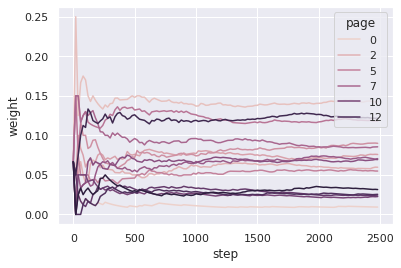

In [85]:
random.seed(1)
np.random.seed(1)

def distance(vec_1: np.ndarray, vec_2: np.ndarray):
    """
    Compute the eucledian distance between two vectors.
    
    :param vec_1: first vector
    :param vec_2: second vector
    :return: euclidean distance between the vectors
    """
    return np.linalg.norm(vec_1 - vec_2)

def random_walk(transition_matrix: np.ndarray, weight_update_interval: int = 20,
                epsilon: float = 0.001, num_pages: int = 15):
    """
    Execute the random walk.
    
    :param transition_matrix: transition matrix
    :param weight_update_interval: number of walking steps between weight updates
    :param epsilon: convergence threshold
    :param num_pages: number of webpages
    :return: dataframe of weights for different pages at different steps
    """
    data=pd.DataFrame(columns=['page','step','weight'])
    total_data=pd.DataFrame(columns=['page','step','weight'])
    page=range(15)
    w=np.full(num_pages,1/num_pages)
    c=np.zeros(num_pages)
    length=0
    for step in range(weight_update_interval+1):
        if step==0:
            total_data['page']=page
            total_data['step']=step
            total_data['weight']=w
            #display(total_data)
            next_page=random.randint(0,num_pages-1)
            c[next_page]+=1
        else:
            if step==weight_update_interval:
                for i in range(num_pages):
                    w[i]=c[i]/step
                data['page']=page
                data['step']=step
                data['weight']=w
                total_data=total_data.append(data,ignore_index=True)
                length=step
            else:
                next_page=get_next_page(next_page, transition_matrix)
                c[next_page]+=1
                
    while distance(w, total_data[total_data['step']==length-weight_update_interval]['weight'].values)>epsilon:
        for step in range(1,weight_update_interval+1):
            next_page=get_next_page(next_page, transition_matrix)
            c[next_page]+=1
            if step==weight_update_interval :
                length+=step
                for i in range(num_pages):
                    w[i]=c[i]/length
                data['page']=page
                data['step']=length
                data['weight']=w
                total_data=total_data.append(data,ignore_index=True)
    return total_data
        
pagerank_results=random_walk(transition_matrix)
display(pagerank_results)

# This plots a graph showing the convergence of the page weights as the random walk progresses
# make sure your data frame has the right format for the graph to make sense
sns.lineplot(data=pagerank_results, x="step", y="weight", hue="page")

__g) Display all webpages and their final weights ranked by their final weights (highest-ranked webpage first).__

In [86]:
final_weights=pagerank_results[pagerank_results['step']==2480].sort_values(by=['weight'],ascending=False)
display(final_weights)
#print(final_weights['weight'].sum())

,page,step,weight
1861,1,2480,0.142339
1873,13,2480,0.121774
1866,6,2480,0.118145
1864,4,2480,0.089919
1867,7,2480,0.085484
1863,3,2480,0.075806
1868,8,2480,0.070565
1869,9,2480,0.069355
1862,2,2480,0.059677
1865,5,2480,0.054839


## Task 2: Clustering (8 Points)

In this task, you will find clusters of similar arguments for a variety of topics.

__About the data__:

The data for this task is stored in `topic_arguments.tsv`. Each row contains a `topic` identifier, two arguments `argument_1` and `argument_2`, and a `label` that describes the similarity between the two arguments. The dataset contains multiple arguments for each topic.

The labels have the following meanings:

* _NS_: no similarity
* _DTORCD_: different topic or can't decide
* _SS_: some similarity
* _HS_: high similarity

These labels will be used to evaluate how well the clustering works.

### Computing the Clusters (6 Points)

__a) Load the data and lowercase `argument_1` and `argument_2` in each row. Display the `.head()` of the loaded dataframe.__

In [87]:
data=pd.read_csv('topic_arguments.tsv',sep='\t')
for i in range(len(data)):
    data['argument_1'].iloc[i]=str(data['argument_1'].iloc[i]).lower()
    data['argument_2'].iloc[i]=str(data['argument_2'].iloc[i]).lower()
display(data.head())

,topic,argument_1,argument_2,label
0,3d printing,3d printed products can improve health outcome...,"specifically, the navy hopes to see 3d printin...",NS
1,3d printing,this could greatly increase the quality of lif...,"the advent and spread of new technologies, lik...",DTORCD
2,3d printing,controlled print chamber: controlled process e...,the new non-clog technology and moisture-lock ...,SS
3,3d printing,spark will make visualization of prints much e...,the cube pro features a controlled environment...,NS
4,3d printing,affordable 3d printing for everyone with the u...,"the experience centre, combined with our new s...",SS


__b) Imlement the function `cluster_and_predict(...)`. It should:__

* fit the given `vectorizer` on all _unique_ arguments in the `dataframe` (all topics)
* vectorize all _unique_ arguments of the specified `topic` using this `vectorizer`
* fit the given `clustering_model` on these computed vectors
* output the cluster for each argument of the specified `topic`

The output should map each argument to a cluster id as shown below:

```python
{
    "This is one argument": 1,
    "This is a similar argument": 1,
    "This is another very different argument.": 2
}
```

where `1` and `2` are the cluster ids (assigned by the clustering algorithm).


__Apply the function using:__

* a `TfidfVectorizer()` as the `vectorizer`
* an `AgglomerativeClustering(n_clusters=None, distance_threshold=0.8, affinity='cosine', linkage='average')` as the `clustering_model`
* `'Solar energy'` as the `topic`

__and evaluate it using the provided evaluation method.__

__Hint:__ Use the attribute `.labels_` of the clustering model.

In [88]:
def cluster_and_predict(df: pd.DataFrame, vectorizer: TfidfVectorizer,
                        clustering_model: AgglomerativeClustering, topic: str = "Solar energy"):
    """
    Cluster all unique arguments from all of (argument_1 | argument_2) and output the cluster mappings.
    
    :param df: dataframe (as loaded)
    :param vectorizer: vectorizer from sklearn
    :param clustering_model: clustering algorithm from sklearn
    :param topic: only arguments from this topic will be clustered
    :return: mappings from arguments to cluster ids
    """
    
    arg=pd.DataFrame(columns=['argument'])
    corpus=[]
    result={}
    total_corpus=[]

    for i in range(len(df[df['topic']==topic])):
        corpus.append(df[df['topic']==topic]['argument_1'].iloc[i])
        corpus.append(df[df['topic']==topic]['argument_2'].iloc[i])
    corpus=list(set(corpus))
    #arg['argument']=corpus
   # display(arg)
    for j in range(len(df)):
        total_corpus.append(df['argument_1'].iloc[j])
        total_corpus.append(df['argument_2'].iloc[j])
    total_corpus=list(set(total_corpus))
    vec=vectorizer.fit(total_corpus)
    arg_v=vec.transform(corpus)
    clustering = clustering_model.fit(arg_v.toarray())
    label=clustering.labels_
    for i in range(len(label)):
        result[corpus[i]]=label[i]
    return result

def evaluate(df: pd.DataFrame, predictions: Mapping[str, int], topic: str = "Solar energy"):
    """
    Evaluate the found clusters for a single topic using the similarity labels
    
    :param df: dataframe (as loaded)
    :param predictions: mappings from arguments to cluster ids from cluster_and_predict(...)
    :param topic: only argument pairs from this topic will be considered
    :return: f_mean (mean of f1(sim) and f1(dissim))
    """
    print("number of predictions:", len(predictions))
    
    def to_binary_label(label):
        if label in ["HS", "SS"]:
            return 1
        else:
            return 0
    
    y_true = []
    y_pred = []
    for ix, row in df[df["topic"] == topic].iterrows():
        if row["argument_1"] not in predictions or row["argument_2"] not in predictions:
            raise ValueError("Make sure that all arguments from the topic also exist in the predictions.")
        
        y_true.append(to_binary_label(row["label"]))
        y_pred.append(predictions[row["argument_1"]] == predictions[row["argument_2"]])
        
    f_sim = f1_score(y_true, y_pred, pos_label=1)
    f_dissim = f1_score(y_true, y_pred, pos_label=0)
    f_mean = np.mean([f_sim, f_dissim])
    
    print(f"F_sim: {f_sim}, F_dissim: {f_dissim}, F_mean: {f_mean}")
    
    return f_mean

predictions=cluster_and_predict(data,TfidfVectorizer(),AgglomerativeClustering(n_clusters=None, distance_threshold=0.8, affinity='cosine', linkage='average'))
#print(predictions)
print(evaluate(data, predictions))

number of predictions: 82
F_sim: 0.16393442622950818, F_dissim: 0.7272727272727273, F_mean: 0.4456035767511177
0.4456035767511177


__c) Run a search over all `distance_thresholds` in `np.linspace(0.7, 1.0, 13)` (leave all other parameters as set in 2b) to find the best value for `distance_threshold` (based on f_mean) for the topic `'Solar energy'`.__

__What is the best `distance_threshold` and the `f_mean` it achieves?__

the best distance_threshold is 0.95 and the f_mean is 0.5873947935016637.

In [89]:
for distance_thresholds in np.linspace(0.7,1.0,13):
    predictions=cluster_and_predict(data,TfidfVectorizer(),AgglomerativeClustering(n_clusters=None, distance_threshold=distance_thresholds, affinity='cosine', linkage='average'))
    print("distance_thresholds:",distance_thresholds)
    print(evaluate(data, predictions))
    
predictions=cluster_and_predict(data,TfidfVectorizer(),AgglomerativeClustering(n_clusters=None, distance_threshold=0.95, affinity='cosine', linkage='average'))    

distance_thresholds: 0.7
number of predictions: 82
F_sim: 0.08333333333333333, F_dissim: 0.78, F_mean: 0.4316666666666667
0.4316666666666667
distance_thresholds: 0.725
number of predictions: 82
F_sim: 0.12244897959183672, F_dissim: 0.7839195979899497, F_mean: 0.45318428879089323
0.45318428879089323
distance_thresholds: 0.75
number of predictions: 82
F_sim: 0.12244897959183672, F_dissim: 0.7839195979899497, F_mean: 0.45318428879089323
0.45318428879089323
distance_thresholds: 0.7749999999999999
number of predictions: 82
F_sim: 0.1568627450980392, F_dissim: 0.7817258883248732, F_mean: 0.4692943167114562
0.4692943167114562
distance_thresholds: 0.7999999999999999
number of predictions: 82
F_sim: 0.16393442622950818, F_dissim: 0.7272727272727273, F_mean: 0.4456035767511177
0.4456035767511177
distance_thresholds: 0.825
number of predictions: 82
F_sim: 0.2222222222222222, F_dissim: 0.7351351351351351, F_mean: 0.47867867867867864
0.47867867867867864
distance_thresholds: 0.85
number of predictio

### Displaying the Clusters (2 Points)

For simplicity, we are only interested in the topic 'Solar energy'. Note that in reality, we would need to evaluate the derived hyperparameters on a different unseen dataset and different topics. To make things easier, we skip this and assume we have found a general clustering method.

__d) Implement the function `to_ordered_clusters(...)`. Based on the output of `cluster_and_predict(...)`, it should:__

* create a list that contains a list of unique arguments for each cluster:
```python
[
    ["something about the sun.", "something else about the sun"], # first cluster arguments
    ["something about energy consumption", "..."], # second cluster arguments
    # ...
]
```
* remove all clusters that contain less than `min_arguments=3` unique arguments
* sort all clusters based on the number of unique arguments they contain (with the cluster that contains the most arguments first)

__Apply it on the clusters of the topic 'Solar energy' based on the best `distance_threshold` you found in 2c). If you did not solve 2c), you can choose use the same parameters as in 2b).__

__Use the output of `to_ordered_clusters(...)` as the input for the already implemented function `print_keywords(...)` to display the top `k=10` keywords for each cluster of the topic 'Solar energy'.__

In [90]:
def to_ordered_clusters(predictions: Mapping[str, int], min_arguments: int = 3):
    """
    Returns a sorted list of lists of arguments of all clusters that have more than min_arguments arguments.
    
    :param predictions: mappings from arguments to cluster ids
    :param min_arguments: minimum number of arguments a cluster must have to not be filtered out
    :return: list of lists of arguments
    """
    cluster=[]
    clean_cluster=[]
    for i in range(max(predictions.values())):
        cluster.append([k for k,v in predictions.items() if v==i])
    clean_cluster=[x for x in cluster if len(x)>=min_arguments]
    clean_cluster.sort(key= lambda i:len(i),reverse=True)
    return clean_cluster
    
                  

def print_keywords(clusters: list[list[str]], k: int = 10):
    """
    Print the top k words (based on tf-idf weight) for each cluster.
    
    :param clusters: list of lists of arguments
    :param k: number of keywords to print
    """
    
    clusters_merged = [" ".join(arguments) for arguments in clusters]
    vectorizer = TfidfVectorizer(stop_words='english')
    features = vectorizer.fit_transform(clusters_merged).toarray()
    
    # sort by tf-idf value and extract token ids with the highest score
    sorted_features = np.argsort(features)
    top_sorted_features = sorted_features[:,-k:]
    
    for cluster_idx in range(top_sorted_features.shape[0]):
        print(f"Cluster #{cluster_idx} ({len(clusters[cluster_idx])} arguments)")
        for idx in top_sorted_features[cluster_idx,::-1]:
            if features[cluster_idx,idx] > 0:
                print("*", vectorizer.get_feature_names()[idx])
        print("---\n")
ordered_clusters=to_ordered_clusters(predictions) 
print_keywords(ordered_clusters)

Cluster #0 (46 arguments)
* solar
* energy
* power
* carbon
* reduce
* save
* money
* reducing
* way
* consumers
---

Cluster #1 (6 arguments)
* environmentally
* friendly
* cost
* people
* environment
* effective
* energy
* responsible
* healthier
* claims
---

Cluster #2 (5 arguments)
* future
* good
* fruit
* longest
* disease
* procedure
* dexterity
* devices
* longer
* conjecture
---

Cluster #3 (4 arguments)
* financing
* clean
* creative
* agreements
* property
* purchase
* party
* pace
* assessed
* options
---

Cluster #4 (3 arguments)
* online
* shopping
* 50
* created
* equally
* tissot
* portal
* groups
* buy
* designs
---

Cluster #5 (3 arguments)
* getting
* foreign
* oil
* reduced
* rupees
* germs
* crores
* stressful
* turn
* unwanted
---



Please upload in Moodle your working Jupyter-Notebook **before next exercise session** (Jan 27, 16:14pm). Submission format: Group_No_Exercise_No.zip<br>
Submission should contain your filled out Jupyter notebook (naming schema: Group_No_Exercise_No.ipynb) and any auxiliar files that are necessary to run your code (e.g. datasets provided by us).  
Each submission must only be handed in once per group.